In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error

#os.chdir('C:\\Users\Matthew...')
path = os.getcwd()

df = pd.read_csv('iris.csv')

In [2]:
#EDA (Exploratory Data Analysis)
#Show head, info, and describe
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#There are no missing values
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

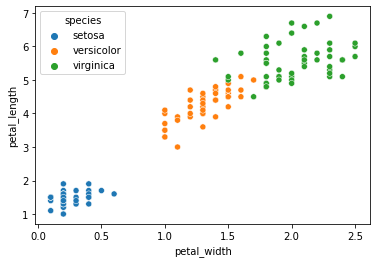

In [6]:
#Scatter plot of species vs petal width and length
sns.scatterplot(x='petal_width', y='petal_length', data=df, hue='species')

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

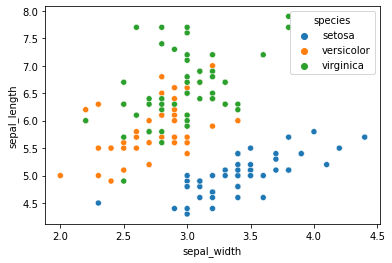

In [7]:
#Scatter plot of species vs sepal width and length
sns.scatterplot(x='sepal_width', y='sepal_length', data=df, hue='species')

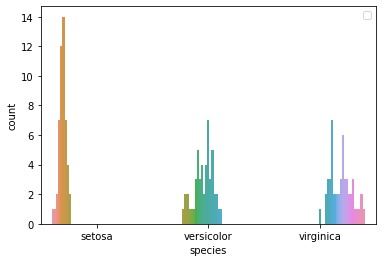

In [8]:
#Countplot of species with hue of petal length
sns.countplot(x = 'species', data = df, hue='petal_length')
plt.legend("")

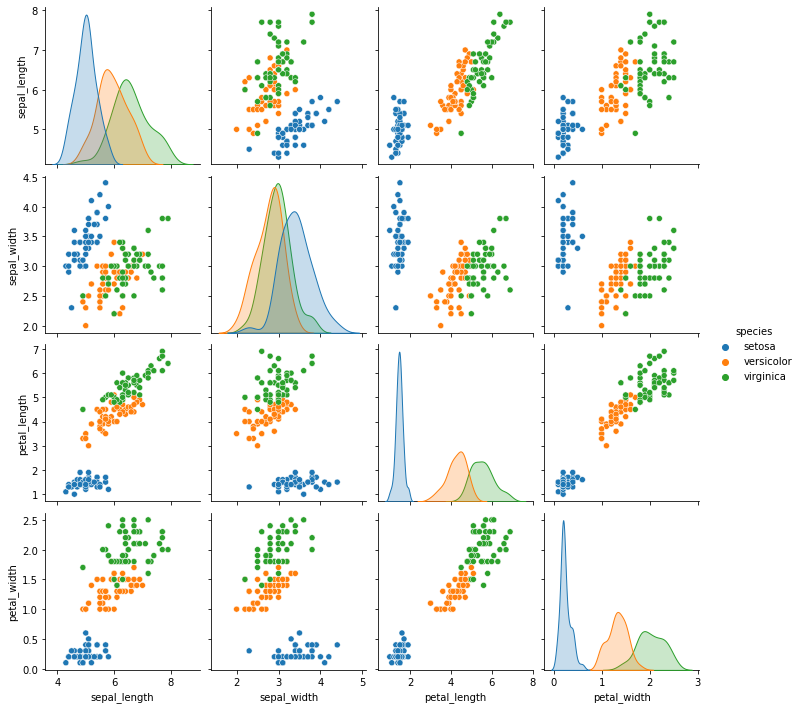

In [9]:
#pairplot of species
sns.pairplot(df, hue='species')

In [10]:
#Train Test Split
X = pd.get_dummies(df.drop("species", axis=1),drop_first=True)
y = df['species']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=(0.3),random_state = 101)

In [12]:
#Calculate error for different number of decision trees
test_error = []
for n in range(1, 60):
    model = RandomForestClassifier(n_estimators=n, max_features = "auto")
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

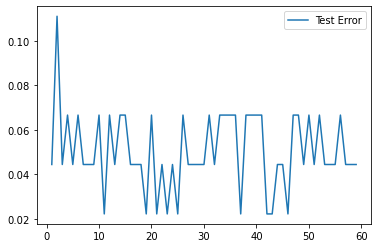

In [13]:
#Plot test error vs the number of decision trees to find the best number of estimators in the forest
plt.plot(range(1,60), test_error, label="Test Error")
plt.legend()

In [14]:
#From the previous model, use 10 estimators and fit to the testing data
model = RandomForestClassifier(n_estimators=10, max_features = "auto", random_state=101)
model.fit(X_train,y_train)
base_preds = model.predict(X_test)

In [15]:
#Show confusion matrix results
confusion_matrix(y_test, base_preds)

array([[13,  0,  0],
       [ 0, 19,  1],
       [ 0,  2, 10]], dtype=int64)

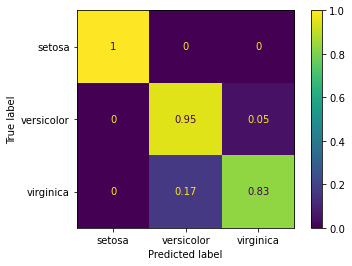

In [16]:
#Plot normalized confusion matrix
plot_confusion_matrix(model, X_test, y_test,normalize = 'true')

In [17]:
#Show weighted feature importances
pd.DataFrame(index=X.columns,data = model.feature_importances_, columns=["Feature Importance"])

,Feature Importance
sepal_length,0.081310
sepal_width,0.049837
petal_length,0.228887
petal_width,0.639966


In [18]:
#Show classifcation report
print(classification_report(y_test,base_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.90      0.95      0.93        20
   virginica       0.91      0.83      0.87        12

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

